In [1]:
pip install pyemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mdtraj-1.9.9-cp310-cp310-linux_x86_64.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
  Using cached deeptime-0.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
  Created wheel for pyemma: filename=pyEMMA-2.5.12-cp310-cp310-linux_x86_64.whl size=2705183 sha256=f851a92366fc21e46a7221d42dd270c56c53cd84bfbd1b9a807f6c07cd5fe276
  Stored in directory: /root/.cache/pip/wheels/26/e7/52/8fcd9a27e834967fc71dedff33de9038999783184ec26af7a6
Successfully built pyemma


In [2]:
pip install mdshare

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.8 MB/s eta 0:00:00
  Created wheel for mdshare: filename=mdshare-0.4.2-py3-none-any.whl size=20621 sha256=b1d57d578f73d2d2d5aad1fd0aeb4d329c6d41377eb6a1b45f66ae98436be770
  Stored in directory: /root/.cache/pip/wheels/c5/f4/43/70d3bd71fa229cd9f55ab315df017a6740c1ea87207f6b75bc
Successfully built mdshare


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
from pyemma.util.contexts import settings

In [4]:
pdb = mdshare.fetch('pentapeptide-impl-solv.pdb', working_directory='data')
files = mdshare.fetch('pentapeptide-*-500ns-impl-solv.xtc', working_directory='data')

In [5]:
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels = ['backbone atom\ndistances']

Obtaining file info:   0%|          | 0/25 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/25 [00:00<?, ?it/s]

In [6]:
tica = pyemma.coordinates.tica(distances_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)

<ipython-input-6-3a8b9307e1bf>:1: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from <ipython-input-6-3a8b9307e1bf> line 1. Use deeptime.decomposition.TICA instead.
  tica = pyemma.coordinates.tica(distances_data, lag=5)


calculate covariances:   0%|          | 0/25 [00:00<?, ?it/s]

getting output of TICA:   0%|          | 0/25 [00:00<?, ?it/s]

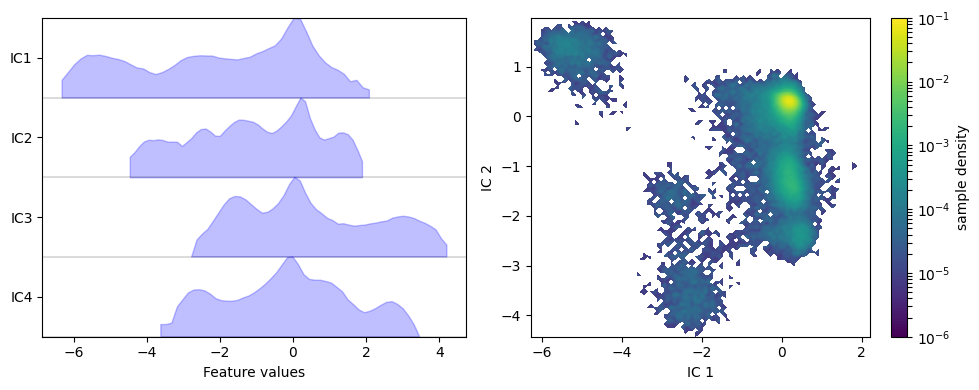

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated[:,:4],
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
    ylog=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()